# Modelo y simulación de un cuerpo libre en un sistema de cuerpos masivos libres

La ley de la gravedad nos dice que entre dos cuerpos con una masa $m1$ y $m2$, va a haber una fuerza que rige la interacción entre ellas. Esta fuerza es la "ley de gravitación universal" y se expresa de la siguiente manera:
$$F=-G\frac{m_1m_2}{r^2}$$

Donde $F$ es la fuerza que sienten los cuerpos, $r$ es la distancia entre estos dos, $m_1$ y $m_2$ las masas de cada uno de los cuerpos y $G$ la constante de gravitación universal.

La idea de este proyecto, es estudiar cómo se comporta una partícula en un espacio donde hallan cuerpos masivos, ver como es su trayectoria y modelarla y animarla con los métodos numéricos y computacionales aprendidos durante el semestre.

## Planteamiento del problema

-Hallar las ecuaciones diferenciales que modelan el movimiento en el tiempo de el cuerpo sometido a la fuerza ejercida por las masas.

-Hallar la forma numérica para resolver estas ecuaciones diferenciales

-Modelar y animar el movimiento que el cuerpo tomaría.

Con las leyes de newton, podemos hacer un diagrama de cuerpo libre para el cuerpo libre que siente las fuerzas de n cuerpos en sus dos dimensiones:

$$m\frac{d^2x}{dt^2}=\sum_{j=1}^{n}G\frac{mM_i}{r_i^2}cos\theta_i$$
$$m\frac{d^2y}{dt^2}=\sum_{j=1}^{n}G\frac{mM_i}{r_i^2}sin\theta_i$$

Si $x$ y $y$ es las coordenadas cartesianas de nuestro cuerpo libre y $x_i$ y $y_i$ las posiciones de los cuerpos fijos y $m_i$ la masa de estos cuerpos, tenemos que las ecuaciones que rigen el movimiento de nuestra partícula es:

$$m\frac{d^2x}{dt^2}=\sum_{j=1}^{n}G\frac{mM_i}{x_i^2+y_i^2}\frac{(x-x_i)}{\sqrt{(x-x_i)^2+(y-y_i)^2}}$$
$$m\frac{d^2y}{dt^2}=\sum_{j=1}^{n}G\frac{mM_i}{x_i^2+y_i^2}\frac{(y-y_i)}{\sqrt{(x-x_i)^2+(y-y_i)^2}}$$

Que es equivalente a:

$$\frac{d^2x}{dt^2}=G\sum_{j=1}^{n}\frac{M_i (x-x_i)}{((x-x_i)^2+(y-y_i)^2)^{3/2}}$$
$$\frac{d^2y}{dt^2}=G\sum_{j=1}^{n}\frac{M_i(y-y_i)}{((x-x_i)^2+(y-y_i)^2)^{3/2}}$$

Vemos que es un sistema de ecuaciones diferenciales acopladas, que analíticamente no siempre es posible resolver, además, dependiendo de nuestro set inicial, (número de masas, posiciones de las masas), las ecuaciones pueden ser más o menos complejas.

Para resolver esto, usaremos el método de Rugen-Kutta, que nos permite hallar los valores de nuestra ecuacion diferencial sin necesidad de resolver analíticamente la ecuación

# Código
Realicemos un código que nos plantee las ecuaciones diferenciales asociadas al movimiento de nuestra partícula:

In [3]:
#Librerías a usar
import numpy as np
import pylab as plt
import scipy.integrate as spi
import sympy as sp
from ipywidgets import interact

Con la ayuda de sympy, dependiendo de las condiciones iniciales de nuestro set, (número de masas y posición de cada una de estas), se va a crear un iterador que cree la ecuación diferencial correspondiente.

Luego, con la función lambdify volvemos estos objetos simbólicos funciones y con estas funciones creamos nuestro modelo de la función para poder usar el método de solucion de ecuaciones diferenciales numérico, en este caso, el método de scipy, "scipy.integrate.odeint"

Luego, para usar "odeint", debemos entregar un arreglo con el tiempo deseado y un arreglo con las condiciones iniciales, y este nos entrega otro arreglo con las posiciones y velocidades en $x$ y $y$ para la partícula en el tiempo que entregamos:

In [54]:
def mov(pos,mi,PV0,t): #pos=Arreglo con las posicones iniciales de los cuerpos #mi:Arreglo con las masas de los cuerpos #PV0:Arreglo con la posición y velocidad inicial del cuerpo libre, t: intervalo de tiempo en el que se quieren obtener las posiciones del cuerpo libre
    ##con sympy definimos las sumatorias:
    x,y=sp.symbols("x y")
    sumdx=0
    sumdy=0
    ##Creamos un iterador que nos agregue a la sumatoria el término de la masa mi 
    for i in range(len(mi)):
        sumdx+=(-mi[i]*(x-pos[i][0]))/((x-pos[i][0])**2+(y-pos[i][1])**2)**(3/2)
    for i in range(len(mi)):
        sumdy+=(-mi[i]*(y-pos[i][1]))/((x-pos[i][0])**2+(y-pos[i][1])**2)**(3/2)
    
    #Con lambdify creamos las funciones
    d2x_dt=sp.lambdify([x,y],sumdx)
    d2y_dt=sp.lambdify([x,y],sumdy)
    
    
    #Entregamos las funciones a nuestro modelo y resolvemos la ecuación diferencial
    def model(U,t):
        x,y,dx,dy=U
        return(dx,dy,d2x_dt(x,y),d2y_dt(x,y))
    ##Obtenemos el arreglo con los valores de la posición y la velocidad de nuestro cuerpo libre para nuestro sistema
    y=spi.odeint(model,PV0,t)
    
    
    ##ANIMACION
    colors=["go","ro","co","mo","yo","ko","wo","g*","r*","c*","m*","y*","k*","w*"] #Colores de los cuerpos
    plt.plot(y[:,0],y[:,1],"-") #Trayectoria
    plt.title("Trayectoria")
    
    for j in range(len(mi)):
            plt.plot(pos[j][0],pos[j][1],colors[j],label=str(mi[j])+" ""masas solares")
    plt.legend()
    @interact
    
    def animacion(Tiempo=np.arange(len(t))):
        
        for j in range(len(mi)):
            plt.plot(pos[j][0],pos[j][1],colors[j],label=str(mi[j])+" ""masas solares")
          
        plt.plot(y[Tiempo][0],y[Tiempo][1],"bo")
        plt.xlim(min(y[:,0])-1,max(y[:,0])+1)
        plt.ylim(min(y[:,1])-1,max(y[:,1])+1)
        plt.title("Animación")
        plt.legend()
        return
    return 

Con nuestro código listo, veamos algunos arreglos interesantes:

Veamos qué pasa con dos cuerpos puestos en (-1,0) y en (1,0) y el cuerpo libre con una posición inicial (0,0) y velocidad inicial (-2,1)
y el cuerpo 1 y 2 con masas iguales:

## NOTA IMPORTANTE:
Para ver las animaciones, varíe el tiempo rápidamente con las flechas del teclado

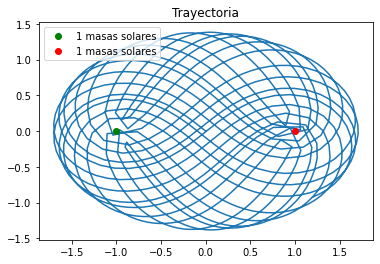

interactive(children=(Dropdown(description='Tiempo', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

In [55]:
t=np.arange(0,100,0.1)
mov([[-1,0],[1,0]],[1,1],[0,0,-1,1],t)

Ahora veamos un arreglo con 3 masas fijas en (0,1),(-1,0) y (0,1) con masas iguales y nuestro cuerpo libre con posición inicial (0,0) y velocidad inicial (-1,1)

C:\Users\Arturo\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


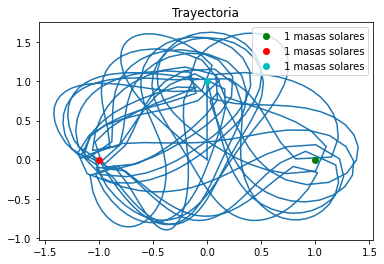

interactive(children=(Dropdown(description='Tiempo', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

In [56]:
mov([[1,0],[-1,0],[0,1]],[1,1,1],[0,0,-1,1],t)


Vemos que para 3 cuerpos el movimiento se vuelve un poco caótico, veamos otro arreglo con 4 cuerpos:

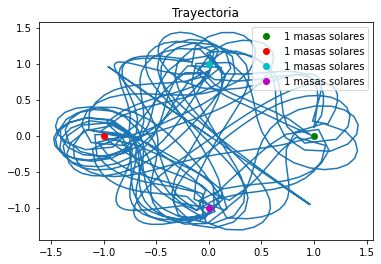

interactive(children=(Dropdown(description='Tiempo', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

In [57]:
mov([[1,0],[-1,0],[0,1],[0,-1]],[1,1,1,1],[0,0,-1,1],t)

Por último veamos un arreglo con un solo cuerpo para ver si se parecería a una trayectoria elipsoidal como se espera:

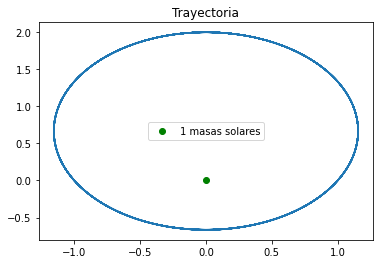

interactive(children=(Dropdown(description='Tiempo', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

In [69]:
mov([[0,0]],[1],[-1,0,-0.5,1],t)

Ahora con el código listo, es cuestión de curiosidad y ganas para crear cuarlquier arreglo de cuerpos y ver como se comportan. 

El código funciona de la siguiente manera:

la primera entrada "pos" es un arreglo que recibe las posiciones iniciales de los cuerpos ejemplo:
[[1,0],[-1,0]]  Este correspondería a dos cuerpos en (1,0) y (-1,0) el primer valor representa la coordenada en x y el segundo en y

La segunda entrada "mi" es un arreglo que recive las masas de los cuerpos en el orden en que se introdujeron en la primera entrada "pos"

La tercera entrada "PV0" es un arreglo que recibe la posición y velocidad inicial del cuerpo libre, [x,y,vx,vy]

La cuarta entrada "t" es el arreglo con el tiempo en el que se desea ver como se comporta el sistema